In [35]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
columns_about_complexity = [
    # "voc_simpson_index",
    "voc_shannon_entropy",
    "lex_avg_dependency_link_length",
    "voc_type_token_ratio",
    "voc_hapax_legomena",
    # "liwc_pronoun",
    # "liwc_affect",
    # "liwc_posemo",
    # "liwc_anger",
    # "liwc_sad",
    # "liwc_swear",
    # "liwc_social",
    # "liwc_death",
    # # "liwc_conversation",
    # # liwc_netspeak",
    # "liwc_assent",
    # "liwc_nonfl",
    # "liwc_filler",
    # "liwc_anx",
    # so far so good
]

In [37]:
def is_in_importants(column):
    for important_column in columns_about_complexity:
        if column.endswith(important_column):
            return True
    return False

In [38]:
column_prefixes = ["^PC", "^similarity_", "^PC", "^mean_"]
file_postfixes = [
    "_pca_similarity.csv",
    "_clean_similarities.csv",
    "_pca_mean.csv",
    "_clean_similarities.csv",
]

data_sources = ["papers", "reddit", "news"]
data_sources_prefixes = ["cl_cv_papers", "reddit", "news"]

In [39]:
data_source_index = 2

similarity_or_mean_pca_or_not = 0

similarity_or_mean_pca_or_not_str_dict = {
    0: "PCA on similarity",
    1: "All similarities",
    2: "PCA on mean",
    3: "All means",
}

In [40]:
data_source = data_sources[data_source_index]
data_source_prefix = data_sources_prefixes[data_source_index]

column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

In [41]:
df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
results_df = pd.read_csv(
    os.path.join(
        data_source,
        "significant_results_" + column_prefix + data_source_prefix + file_postfix,
    )
)

In [42]:
important_columns = results_df[results_df["term"].isin(["POST"])][
    ["PC", "term", "statistic"]
]
important_columns

PC  term  statistic
2   PC1  POST   8.376562
4   PC6  POST   3.431591
5   PC9  POST  -2.582042
6  PC10  POST   2.448289
7  PC11  POST   2.212112

# General Results using PCA or all the features and on the variance or the mean of the features

In [43]:
# for each of the rows in the important columns, using the column, PC, plot that column in the df with respect to the date which can be constructed from the year and month that is in df. Also for each of the plots, highlight the axvline at the date of the introduction of the chatgpt which is on November 2022. do the plots using plotly express

for index, row in important_columns.iterrows():
    column = row["PC"]
    term = row["term"]
    statistic = row["statistic"]
    trend = "higher" if statistic > 0 else "lower"
    type_of_trend = "shock" if term == "ONSET" else "lasting"
    df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str))

    # make the df column with respect to date a bit more smooth using window average
    if similarity_or_mean_pca_or_not == 1:
        df[column] = np.sqrt(df[column])
    df[column] = df[column].rolling(window=5).mean()

    px.line(
        df,
        x="date",
        y=column,
        title=f"{column} vs Date showing a {type_of_trend} {trend} trend (Source: {data_source}) features being {similarity_or_mean_pca_or_not_str_dict[similarity_or_mean_pca_or_not]}",
        labels={"date": "Date", column: f"PC {column}"},
    ).add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    ).add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    ).add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    ).add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    ).show()

    plt.show()
    plt.close()

# Analysis per feature

In [44]:
for data_source_index in range(3):

    similarity_or_mean_pca_or_not = 1

    data_source = data_sources[data_source_index]
    data_source_prefix = data_sources_prefixes[data_source_index]

    column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
    file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

    df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
    results_df = pd.read_csv(
        os.path.join(
            data_source,
            "significant_results_" + column_prefix + data_source_prefix + file_postfix,
        )
    )

    important_columns = results_df[results_df["term"].isin(["POST"])][
        ["PC", "term", "statistic"]
    ]

    for index, row in important_columns.iterrows():
        column = row["PC"]

        if not is_in_importants(column):
            continue
        term = row["term"]
        statistic = row["statistic"]
        trend = "higher" if statistic > 0 else "lower"
        type_of_trend = "shock" if term == "ONSET" else "lasting"
        df["date"] = pd.to_datetime(
            df["year"].astype(str) + "-" + df["month"].astype(str)
        )

        # make the df column with respect to date a bit more smooth using window average
        if similarity_or_mean_pca_or_not in [0, 1]:
            df[column] = np.sqrt(df[column])
        df[column] = df[column].rolling(window=5).mean()

        px.line(
            df,
            x="date",
            y=column,
            title=f"{column} vs Date showing a {type_of_trend} {trend} trend (Source: {data_source}) features being {similarity_or_mean_pca_or_not_str_dict[similarity_or_mean_pca_or_not]}",
            labels={"date": "Date", column: f"PC {column}"},
        ).add_vline(
            x="2022-11-01",
            line_dash="dash",
            line_color="red",
        ).add_vline(
            x="2023-03-14",
            line_dash="dash",
            line_color="blue",
        ).add_annotation(
            x="2022-11-01",
            y=-0.1,
            text="ChatGPT Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).add_annotation(
            x="2023-03-14",
            y=-0.2,
            text="GPT-4 Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).show()

        plt.show()
        plt.close()

# Analysis on the complexity-related features

In [45]:
for data_source_index in range(3):

    similarity_or_mean_pca_or_not = 1

    data_source = data_sources[data_source_index]
    data_source_prefix = data_sources_prefixes[data_source_index]

    column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
    file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

    df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
    results_df = pd.read_csv(
        os.path.join(
            data_source,
            "significant_results_" + column_prefix + data_source_prefix + file_postfix,
        )
    )

    for column in df.columns:
        if not is_in_importants(column):
            continue

        df["date"] = pd.to_datetime(
            df["year"].astype(str) + "-" + df["month"].astype(str)
        )

        # make the df column with respect to date a bit more smooth using window average
        if similarity_or_mean_pca_or_not in [0, 1]:
            df[column] = np.sqrt(df[column])
        df[column] = df[column].rolling(window=5).mean()

        px.line(
            df,
            x="date",
            y=column,
            title=f"{column} vs Date (Source: {data_source})",
            labels={"date": "Date", column: f"PC {column}"},
        ).add_vline(
            x="2022-11-01",
            line_dash="dash",
            line_color="red",
        ).add_vline(
            x="2023-03-14",
            line_dash="dash",
            line_color="blue",
        ).add_annotation(
            x="2022-11-01",
            y=-0.1,
            text="ChatGPT Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).add_annotation(
            x="2023-03-14",
            y=-0.2,
            text="GPT-4 Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).show()

        plt.show()
        plt.close()

# Analysis on the broad trends (e.g., mostly higher variance after chatgpt or lower) across sources

In [46]:
final_results_data_sources = []
final_results_features = []
final_results_trends = []


for data_source_index in range(3):

    similarity_or_mean_pca_or_not = 1

    data_source = data_sources[data_source_index]
    data_source_prefix = data_sources_prefixes[data_source_index]

    column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
    file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

    df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
    results_df = pd.read_csv(
        os.path.join(
            data_source,
            "significant_results_" + column_prefix + data_source_prefix + file_postfix,
        )
    )

    important_columns = results_df[results_df["term"].isin(["POST"])][
        ["PC", "term", "statistic"]
    ]

    for index, row in important_columns.iterrows():
        column = row["PC"]
        term = row["term"]
        statistic = row["statistic"]
        trend = "higher" if statistic > 0 else "lower"
        type_of_trend = "shock" if term == "ONSET" else "lasting"

        final_results_data_sources.append(data_source)
        final_results_features.append(column)
        final_results_trends.append(trend)

In [47]:
final_results_df = pd.DataFrame(
    {
        "Data Source": final_results_data_sources,
        "Feature": final_results_features,
        "Trend": final_results_trends,
    }
)

In [48]:
# drop the similarity_ from the feature column
final_results_df["Feature"] = final_results_df["Feature"].str.replace("similarity_", "")

In [49]:
def assign_category(feature):

    if (
        "_functional_word_" in feature
        or "lex_punctuation" in feature
        or "lex_functional_words_count" in feature
        or "lex_special_char_count" in feature
    ):
        return "Functional"
    elif "_pos_" in feature:
        return "POS"
    elif "_ner_" in feature:
        return "NER"
    elif "voc_" in feature or feature == "lex_lexical_density":
        return "Vocabulary"
    elif "liwc" in feature:
        return "LIWC"
    elif "_dep_" in feature or "dependency" in feature:
        return "Dependency"
    elif "_length_" in feature:
        return "Length"

    else:
        return "None"

In [50]:
final_results_df["Category"] = final_results_df["Feature"].apply(assign_category)

In [51]:
final_results_df[final_results_df["Category"] == "None"]

Empty DataFrame
Columns: [Data Source, Feature, Trend, Category]
Index: []

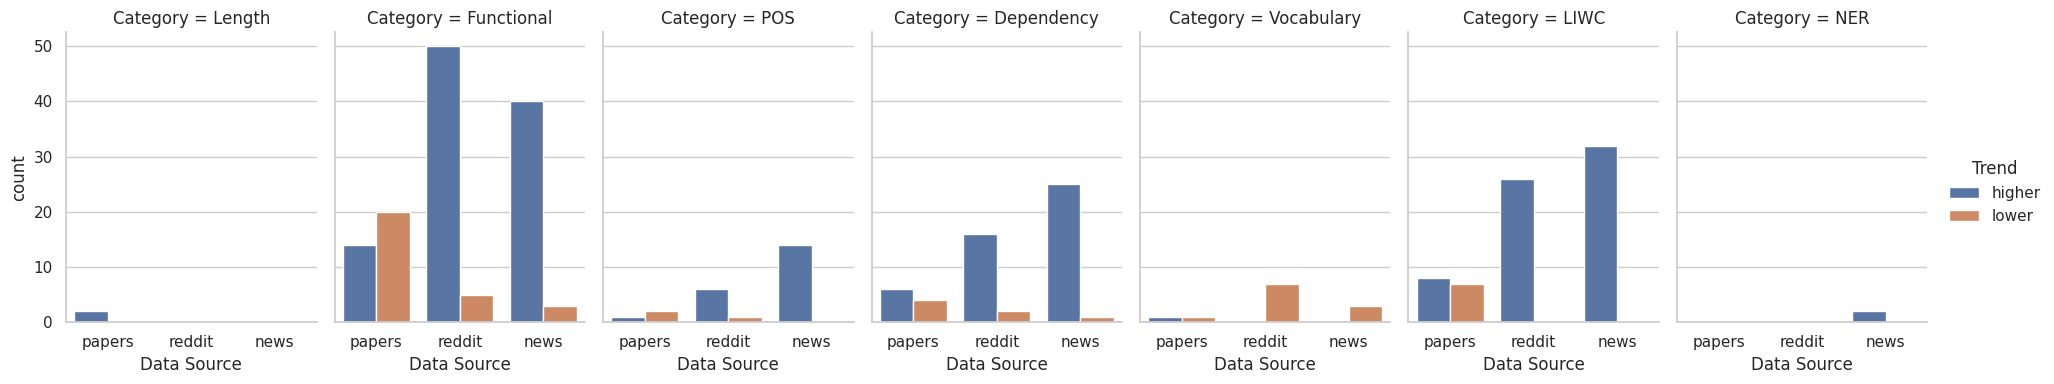

In [52]:
## draw a bar plot, one for each data source, showing the number of features with higher and lower trends

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=final_results_df,
    x="Data Source",
    hue="Trend",
    kind="count",
    col="Category",
    height=4,
    aspect=0.7,
)

In [53]:
# make a piechart showing the distribution of the features that have same trend in all data sources

features_names = []
features_num_trends = []
features_num_sources = []

for feature in final_results_df["Feature"].unique():
    trends = final_results_df[final_results_df["Feature"] == feature]
    num_trends = trends["Trend"].nunique()
    num_sources = trends["Data Source"].nunique()
    features_names.append(feature)
    features_num_trends.append(num_trends)
    features_num_sources.append(num_sources)

features_trends_df = pd.DataFrame(
    {
        "Feature": features_names,
        "Num Trends": features_num_trends,
        "Num Sources": features_num_sources,
    }
)
features_trends_df.head(3)

Feature  Num Trends  Num Sources
0  lex_avg_sent_length_by_char           1            1
1  lex_avg_sent_length_by_word           1            1
2   lex_functional_words_count           2            3

In [54]:
# make a sunburst chart showing the distribution of different variations of the Num Trends and Num Sources
# with sub-pies showing the distribution of Num Sources for each Num Trends value

# change the Num Trends Values and Num Sources values to say that for instance 1 Trend or 2 Trends instead of 1 or 2
features_trends_df["Num Trends Names"] = features_trends_df["Num Trends"].apply(
    lambda x: f"{x} Trend" if x == 1 else f"{x} Trends"
)
features_trends_df["Num Sources Names"] = features_trends_df["Num Sources"].apply(
    lambda x: f"{x} Source" if x == 1 else f"{x} Sources"
)


fig = px.sunburst(
    features_trends_df,
    path=["Num Trends Names", "Num Sources Names"],
    values="Num Sources",
    title="Distribution of Features based on the Number of Trends and Number of Sources",
    hover_data=["Feature"],  # Show feature names on hover,
    labels={
        "Num Trends": "Number of Trends",
        "Num Sources": "Number of Sources",
    },  # More readable labels
)


# Update the layout for better readability
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

# Analysis on the interdependence of trends between the AI-detection analysis, grammar_errors, and other stylistic features

In [55]:
papers_main_df = pd.read_csv("papers/cl_cv_papers_clean_similarities.csv")
reddit_main_df = pd.read_csv("reddit/reddit_clean_similarities.csv")
news_main_df = pd.read_csv("news/news_clean_similarities.csv")

# drop all the data that its year is before 2018
papers_main_df = papers_main_df[papers_main_df["year"] >= 2018]
reddit_main_df = reddit_main_df[reddit_main_df["year"] >= 2018]
news_main_df = news_main_df[news_main_df["year"] >= 2018]

In [56]:
papers_grammar_errors_df = pd.read_csv("papers/cl_cv_papers_errors.csv")
news_grammar_errors_df = pd.read_csv("news/news_errors.csv")
reddit_errors_df = pd.read_csv("reddit/reddit_errors.csv")


papers_grammar_errors_df = papers_grammar_errors_df[
    papers_grammar_errors_df["year"] >= 2018
]
papers_grammar_errors_df = (
    papers_grammar_errors_df.groupby(["year", "month"])["num_errors"]
    .mean()
    .reset_index()
)
news_grammar_errors_df = news_grammar_errors_df[news_grammar_errors_df["year"] >= 2018]
news_grammar_errors_df = (
    news_grammar_errors_df.groupby(["year", "month"])["num_errors"].mean().reset_index()
)
reddit_errors_df = reddit_errors_df[reddit_errors_df["year"] >= 2018]
reddit_errors_df = (
    reddit_errors_df.groupby(["year", "month"])["num_errors"].mean().reset_index()
)

/tmp/ipykernel_2185454/3940610993.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [57]:
# num_thresholds = len(np.arange(0.78, 0.86, 0.01))
# num_rows = (num_thresholds + 2) // 3  # Round up division by 3

# fig, axes = plt.subplots(num_rows, 3, figsize=(20, 16 * num_rows))
# axes = axes.flatten()

# for i, papers_threshold in enumerate(np.arange(0.78, 0.86, 0.01)):
papers_threshold = 0.82
papers_ai_detection_df = pd.read_csv("papers/cl_cv_papers_ai_written.csv")

papers_ai_detection_df["ai_written"] = (
    papers_ai_detection_df["ai_written"] < papers_threshold
)

papers_ai_detection_df = papers_ai_detection_df[papers_ai_detection_df["year"] >= 2018]
papers_ai_detection_df = (
    papers_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

papers_ai_detection_df["date"] = pd.to_datetime(
    papers_ai_detection_df["year"].astype(str)
    + "-"
    + papers_ai_detection_df["month"].astype(str)
)

papers_ai_detection_df["ai_written"] = (
    papers_ai_detection_df["ai_written"].rolling(window=5).mean()
)

fig_px = (
    px.line(
        papers_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in Papers with threshold {papers_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)
fig_px.show()

#     # Convert plotly figure to matplotlib and place in subplot
#     fig_px.write_image(f"temp_fig_{i}.png")
#     img = plt.imread(f"temp_fig_{i}.png")
#     axes[i].imshow(img)
#     axes[i].axis("off")
#     os.remove(f"temp_fig_{i}.png")

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     axes[j].axis("off")

# plt.tight_layout()
# plt.show()

/tmp/ipykernel_2185454/2375400242.py:9: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [58]:
# num_thresholds = len(np.arange(0.81, 0.86, 0.01))
# num_rows = (num_thresholds + 2) // 3  # Round up division by 3

# fig, axes = plt.subplots(num_rows, 3, figsize=(20, 16 * num_rows))
# axes = axes.flatten()

# for i, news_threshold in enumerate(np.arange(0.81, 0.86, 0.01)):
news_threshold = 0.83
news_ai_detection_df = pd.read_csv("news/news_ai_written.csv")

news_ai_detection_df["ai_written"] = news_ai_detection_df["ai_written"] < news_threshold

news_ai_detection_df = news_ai_detection_df[news_ai_detection_df["year"] >= 2018]
news_ai_detection_df = (
    news_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

news_ai_detection_df["date"] = pd.to_datetime(
    news_ai_detection_df["year"].astype(str)
    + "-"
    + news_ai_detection_df["month"].astype(str)
)

news_ai_detection_df["ai_written"] = (
    news_ai_detection_df["ai_written"].rolling(window=5).mean()
)


fig_px = (
    px.line(
        news_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in News with threshold {news_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)
fig_px.show()

In [59]:
# num_thresholds = len(np.arange(0.84, 0.89, 0.01))
# num_rows = (num_thresholds + 2) // 3  # Round up division by 3

# fig, axes = plt.subplots(num_rows, 3, figsize=(20, 16 * num_rows))
# axes = axes.flatten()

# for i, reddit_threshold in enumerate(np.arange(0.84, 0.89, 0.01)):
reddit_threshold = 0.87
reddit_ai_detection_df = pd.read_csv("reddit/reddit_ai_written.csv")

reddit_ai_detection_df["ai_written"] = (
    reddit_ai_detection_df["ai_written"] < reddit_threshold
)

reddit_ai_detection_df = reddit_ai_detection_df[reddit_ai_detection_df["year"] >= 2018]
reddit_ai_detection_df = (
    reddit_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

reddit_ai_detection_df["date"] = pd.to_datetime(
    reddit_ai_detection_df["year"].astype(str)
    + "-"
    + reddit_ai_detection_df["month"].astype(str)
)

reddit_ai_detection_df["ai_written"] = (
    reddit_ai_detection_df["ai_written"].rolling(window=5).mean()
)

fig_px = (
    px.line(
        reddit_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in Reddit with threshold {reddit_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)

fig_px.show()

In [60]:
# papers_main_df = papers_main_df.drop(
#     [col for col in papers_main_df.columns if col.startswith("mean_")], axis=1
# )

papers_merged_df = pd.merge(
    papers_main_df,
    papers_grammar_errors_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_errors"),
)
papers_merged_df = pd.merge(
    papers_merged_df,
    papers_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)

# news_main_df = news_main_df.drop(
#     [col for col in news_main_df.columns if col.startswith("mean_")], axis=1
# )

news_merged_df = pd.merge(
    news_main_df,
    news_grammar_errors_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_errors"),
)

news_merged_df = pd.merge(
    news_merged_df,
    news_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)

# reddit_main_df = reddit_main_df.drop(
#     [col for col in reddit_main_df.columns if col.startswith("mean_")], axis=1
# )

reddit_merged_df = pd.merge(
    reddit_main_df,
    reddit_errors_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_errors"),
)

reddit_merged_df = pd.merge(
    reddit_merged_df,
    reddit_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)

papers_merged_df.to_csv("papers/papers_merged.csv", index=False)
news_merged_df.to_csv("news/news_merged.csv", index=False)
reddit_merged_df.to_csv("reddit/reddit_merged.csv", index=False)

In [61]:
feature_to_look_at = "mean"

In [62]:
def get_top_correlated_features_wrt_ai_detection(merged_df):
    # compute the correlation between each feature and the ai_written + num_errors
    merged_correlation_df = merged_df.set_index(["year", "month"]).corr()
    merged_correlation_df = merged_correlation_df.loc[["ai_written"]]

    ai_top_correlated_features = (
        merged_correlation_df.loc["ai_written"].abs().nlargest(20)
    )
    ai_top_correlated_features = list(
        set(
            [
                *ai_top_correlated_features.index.tolist(),
                *[f"{feature_to_look_at}_{col}" for col in columns_about_complexity],
            ]
        )
    )
    ai_top_correlated_df = merged_correlation_df.loc["ai_written"].loc[
        ai_top_correlated_features
    ]
    return ai_top_correlated_df

In [63]:
papers_ai_top_correlated_df = get_top_correlated_features_wrt_ai_detection(
    papers_merged_df
)
news_ai_top_correlated_df = get_top_correlated_features_wrt_ai_detection(news_merged_df)
reddit_ai_top_correlated_df = get_top_correlated_features_wrt_ai_detection(
    reddit_merged_df
)

In [64]:
len(papers_ai_top_correlated_df), len(news_ai_top_correlated_df), len(
    reddit_ai_top_correlated_df
)

(24, 24, 24)

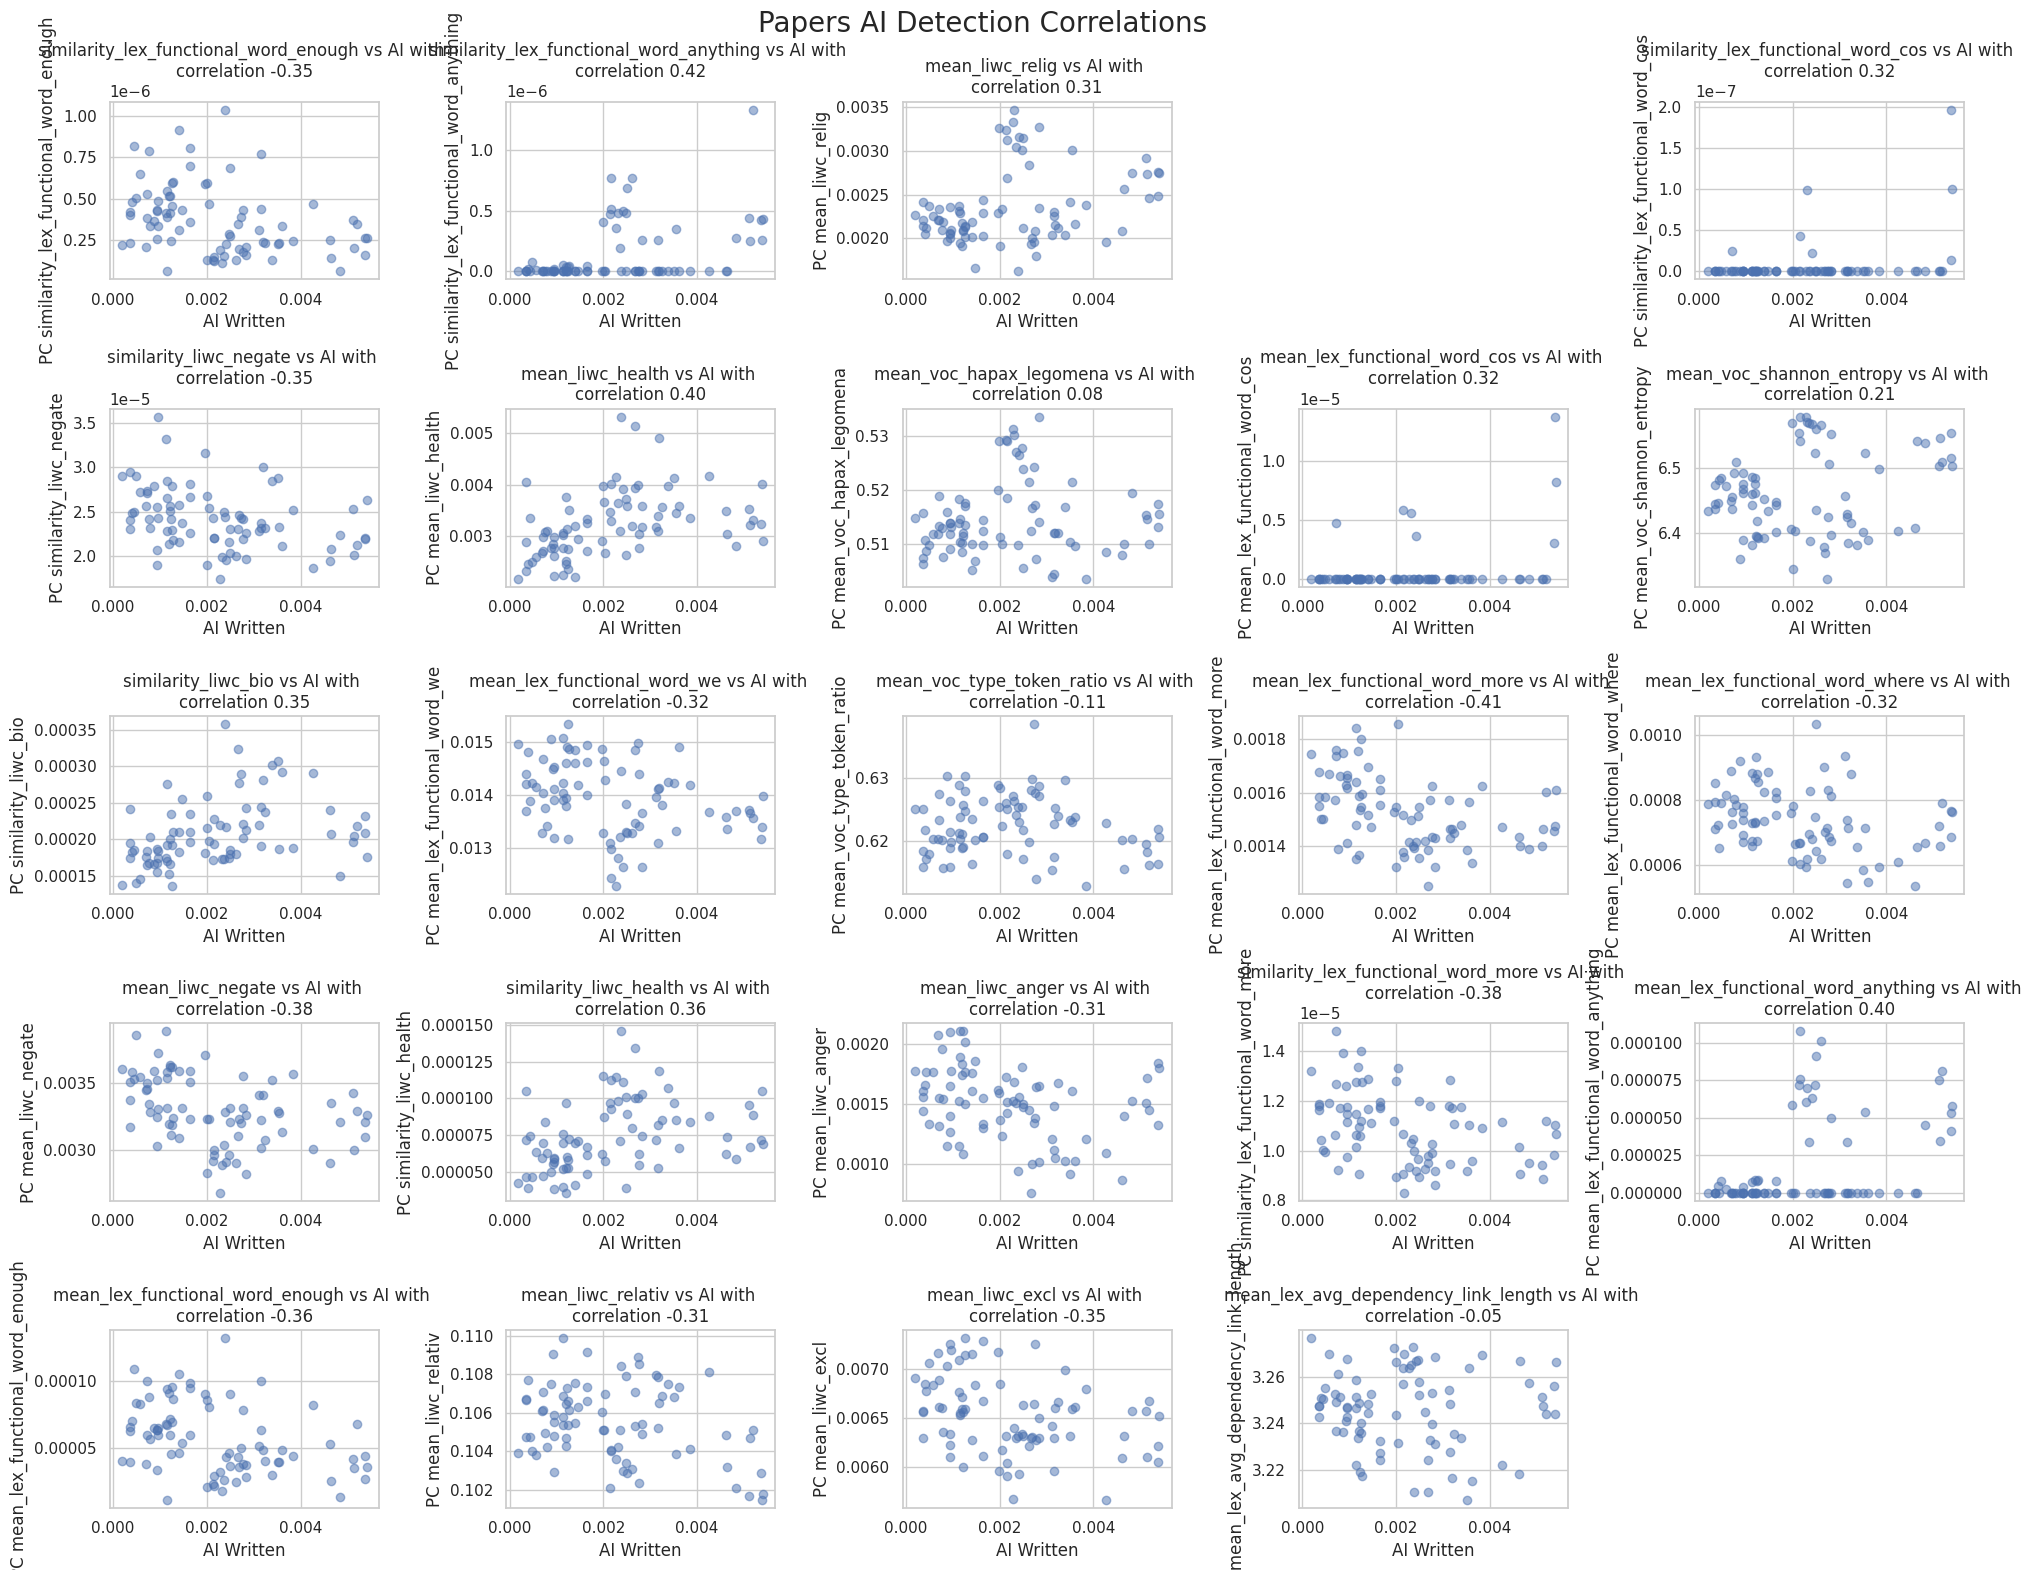

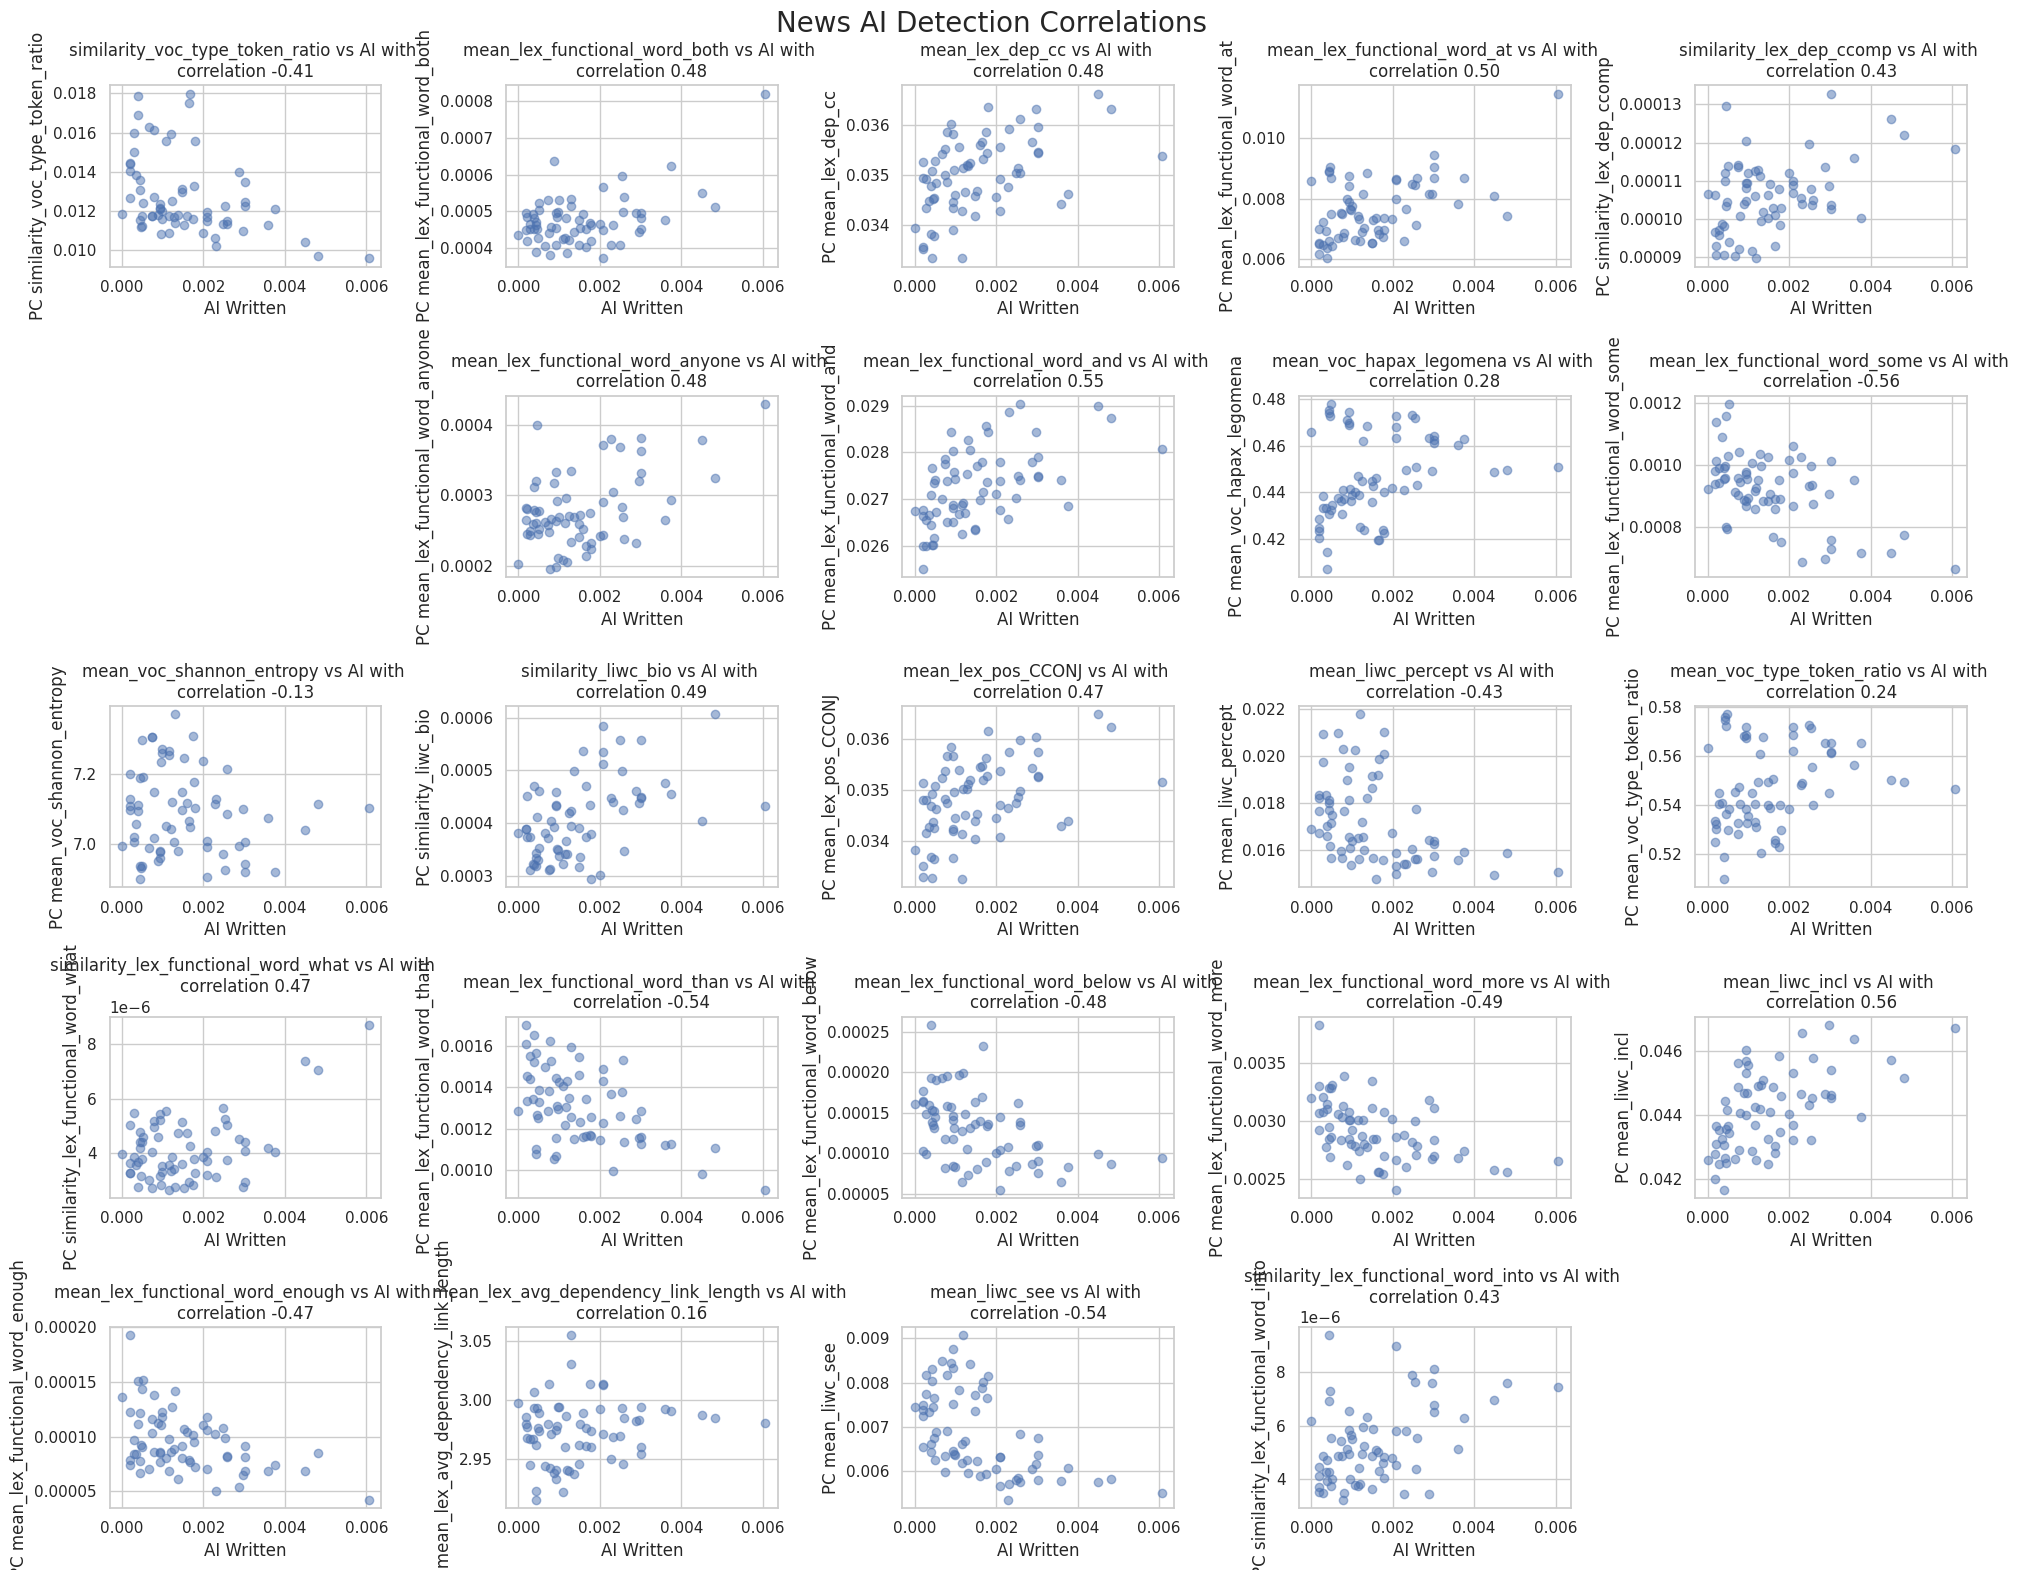

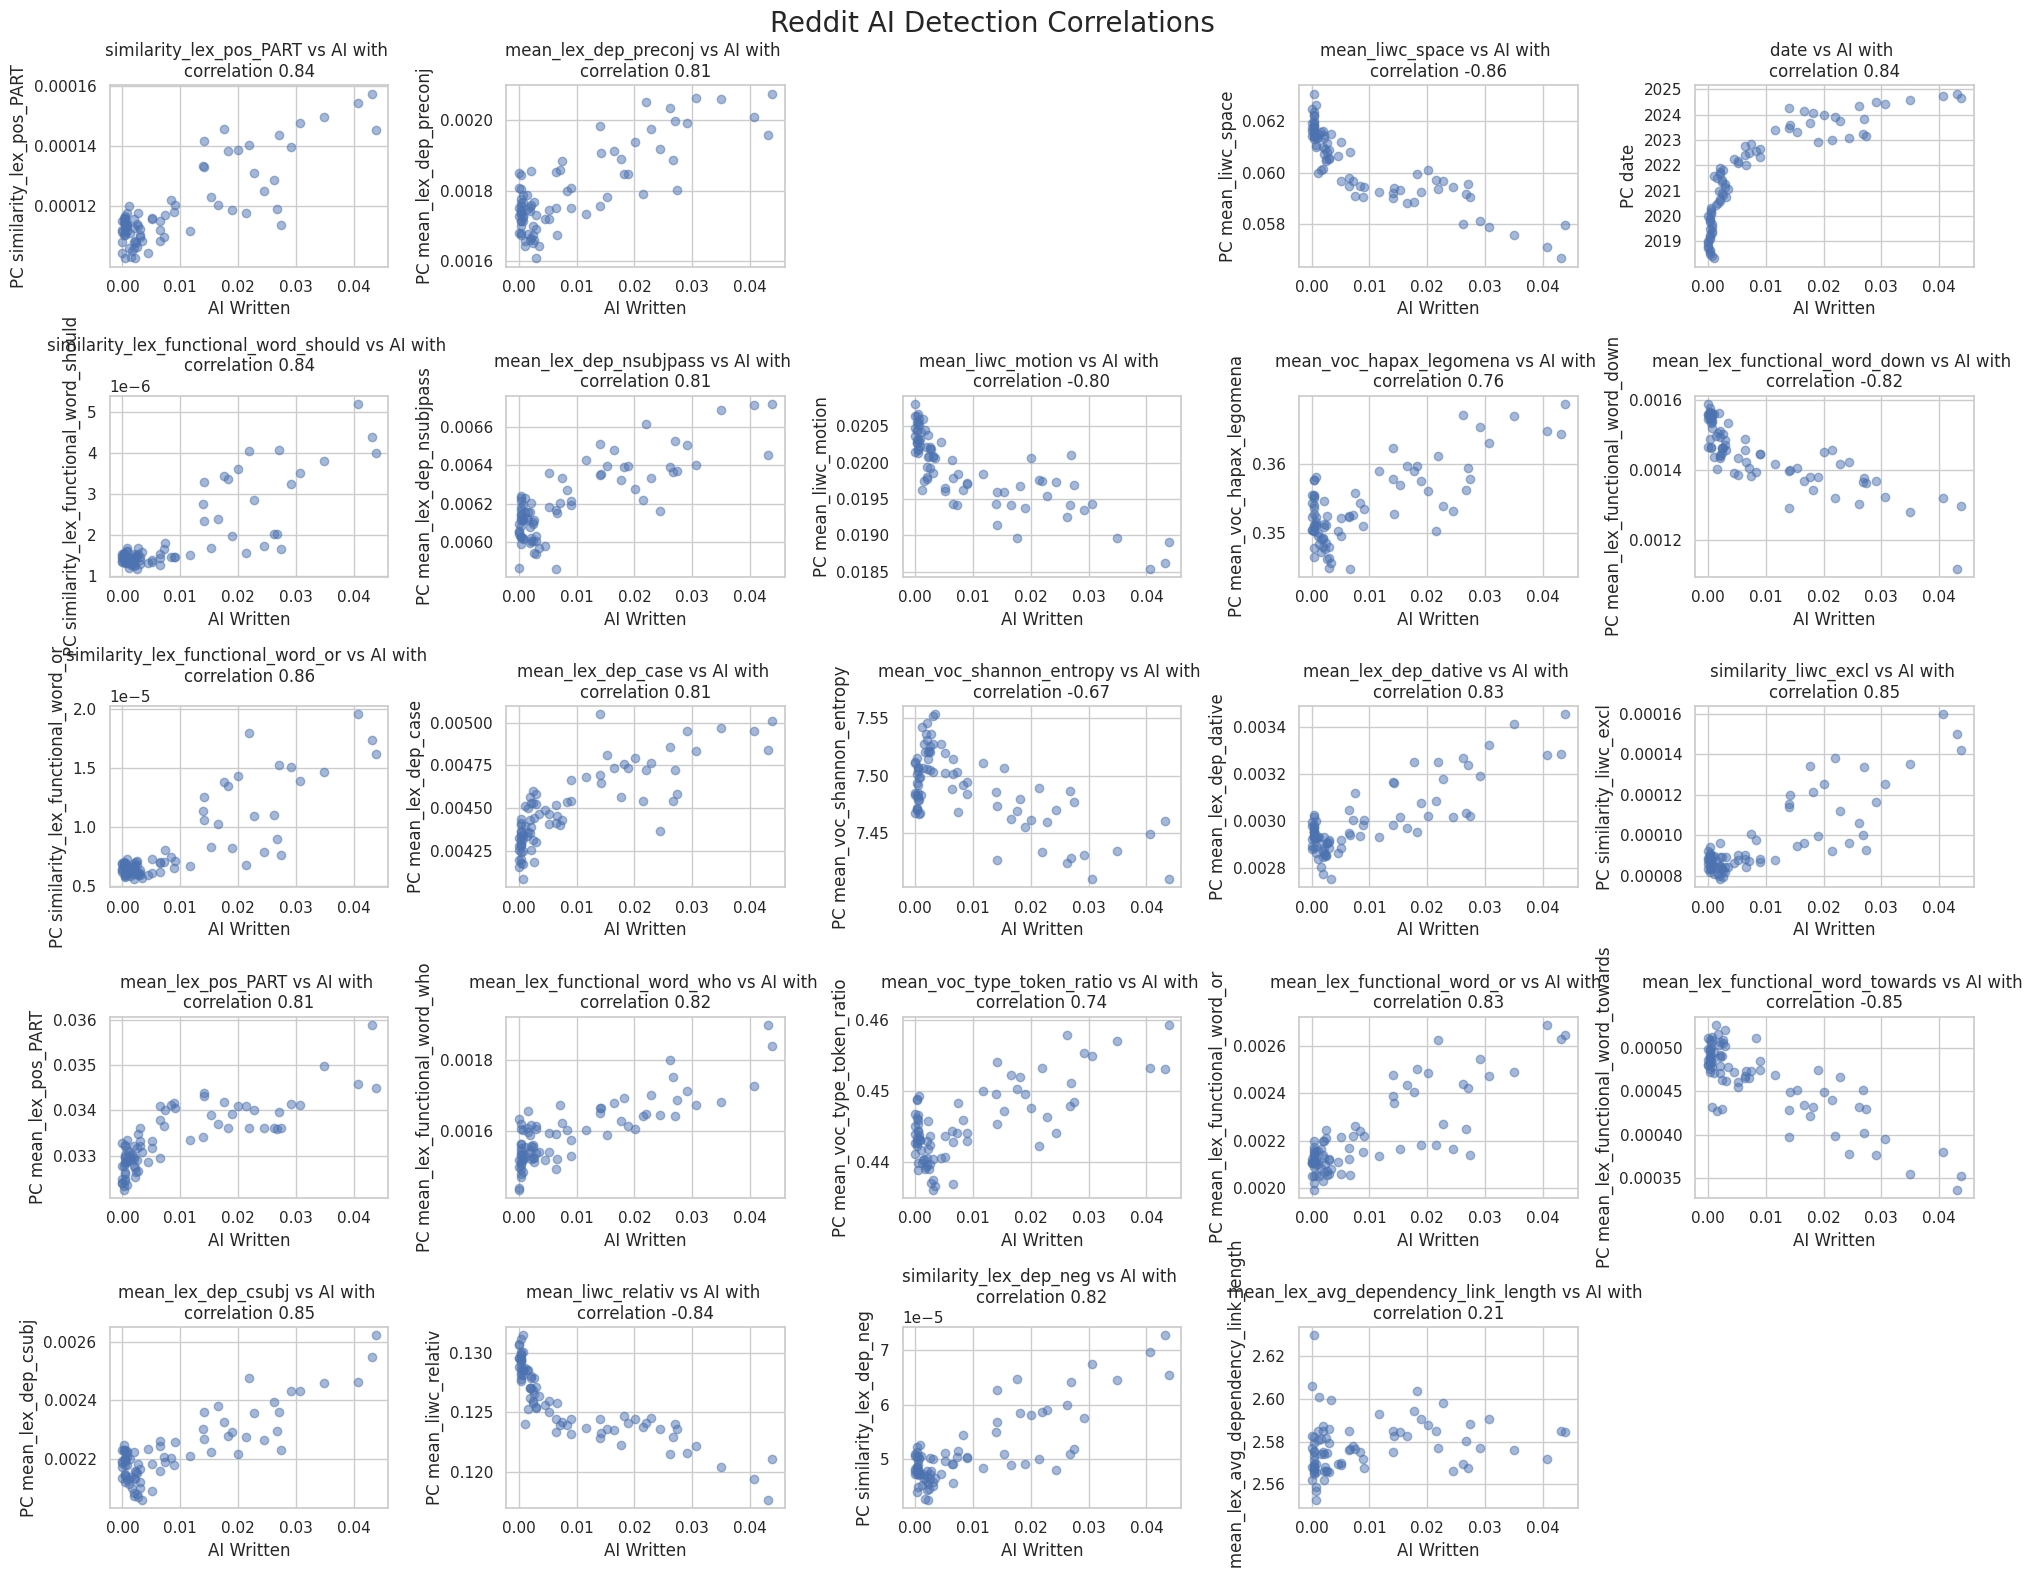

In [65]:
for cor_df, main_df, fig_title in zip(
    [
        papers_ai_top_correlated_df,
        news_ai_top_correlated_df,
        reddit_ai_top_correlated_df,
    ],
    [papers_merged_df, news_merged_df, reddit_merged_df],
    ["Papers", "News", "Reddit"],
):
    fig = plt.figure(figsize=(20, 16))
    # Plot AI correlations in bottom two rows
    for i, feature in enumerate(cor_df.index):
        if feature == "ai_written":
            continue
        ax = plt.subplot(5, 5, i + 1)
        ax.scatter(main_df["ai_written"], main_df[feature], alpha=0.5)
        ax.set_ylabel(f"PC {feature}")
        ax.set_xlabel("AI Written")
        ax.set_title(f"{feature} vs AI with \ncorrelation {cor_df[feature]:.2f}")

    fig.suptitle(f"{fig_title} AI Detection Correlations", fontsize=20)
    plt.tight_layout()
    plt.show()

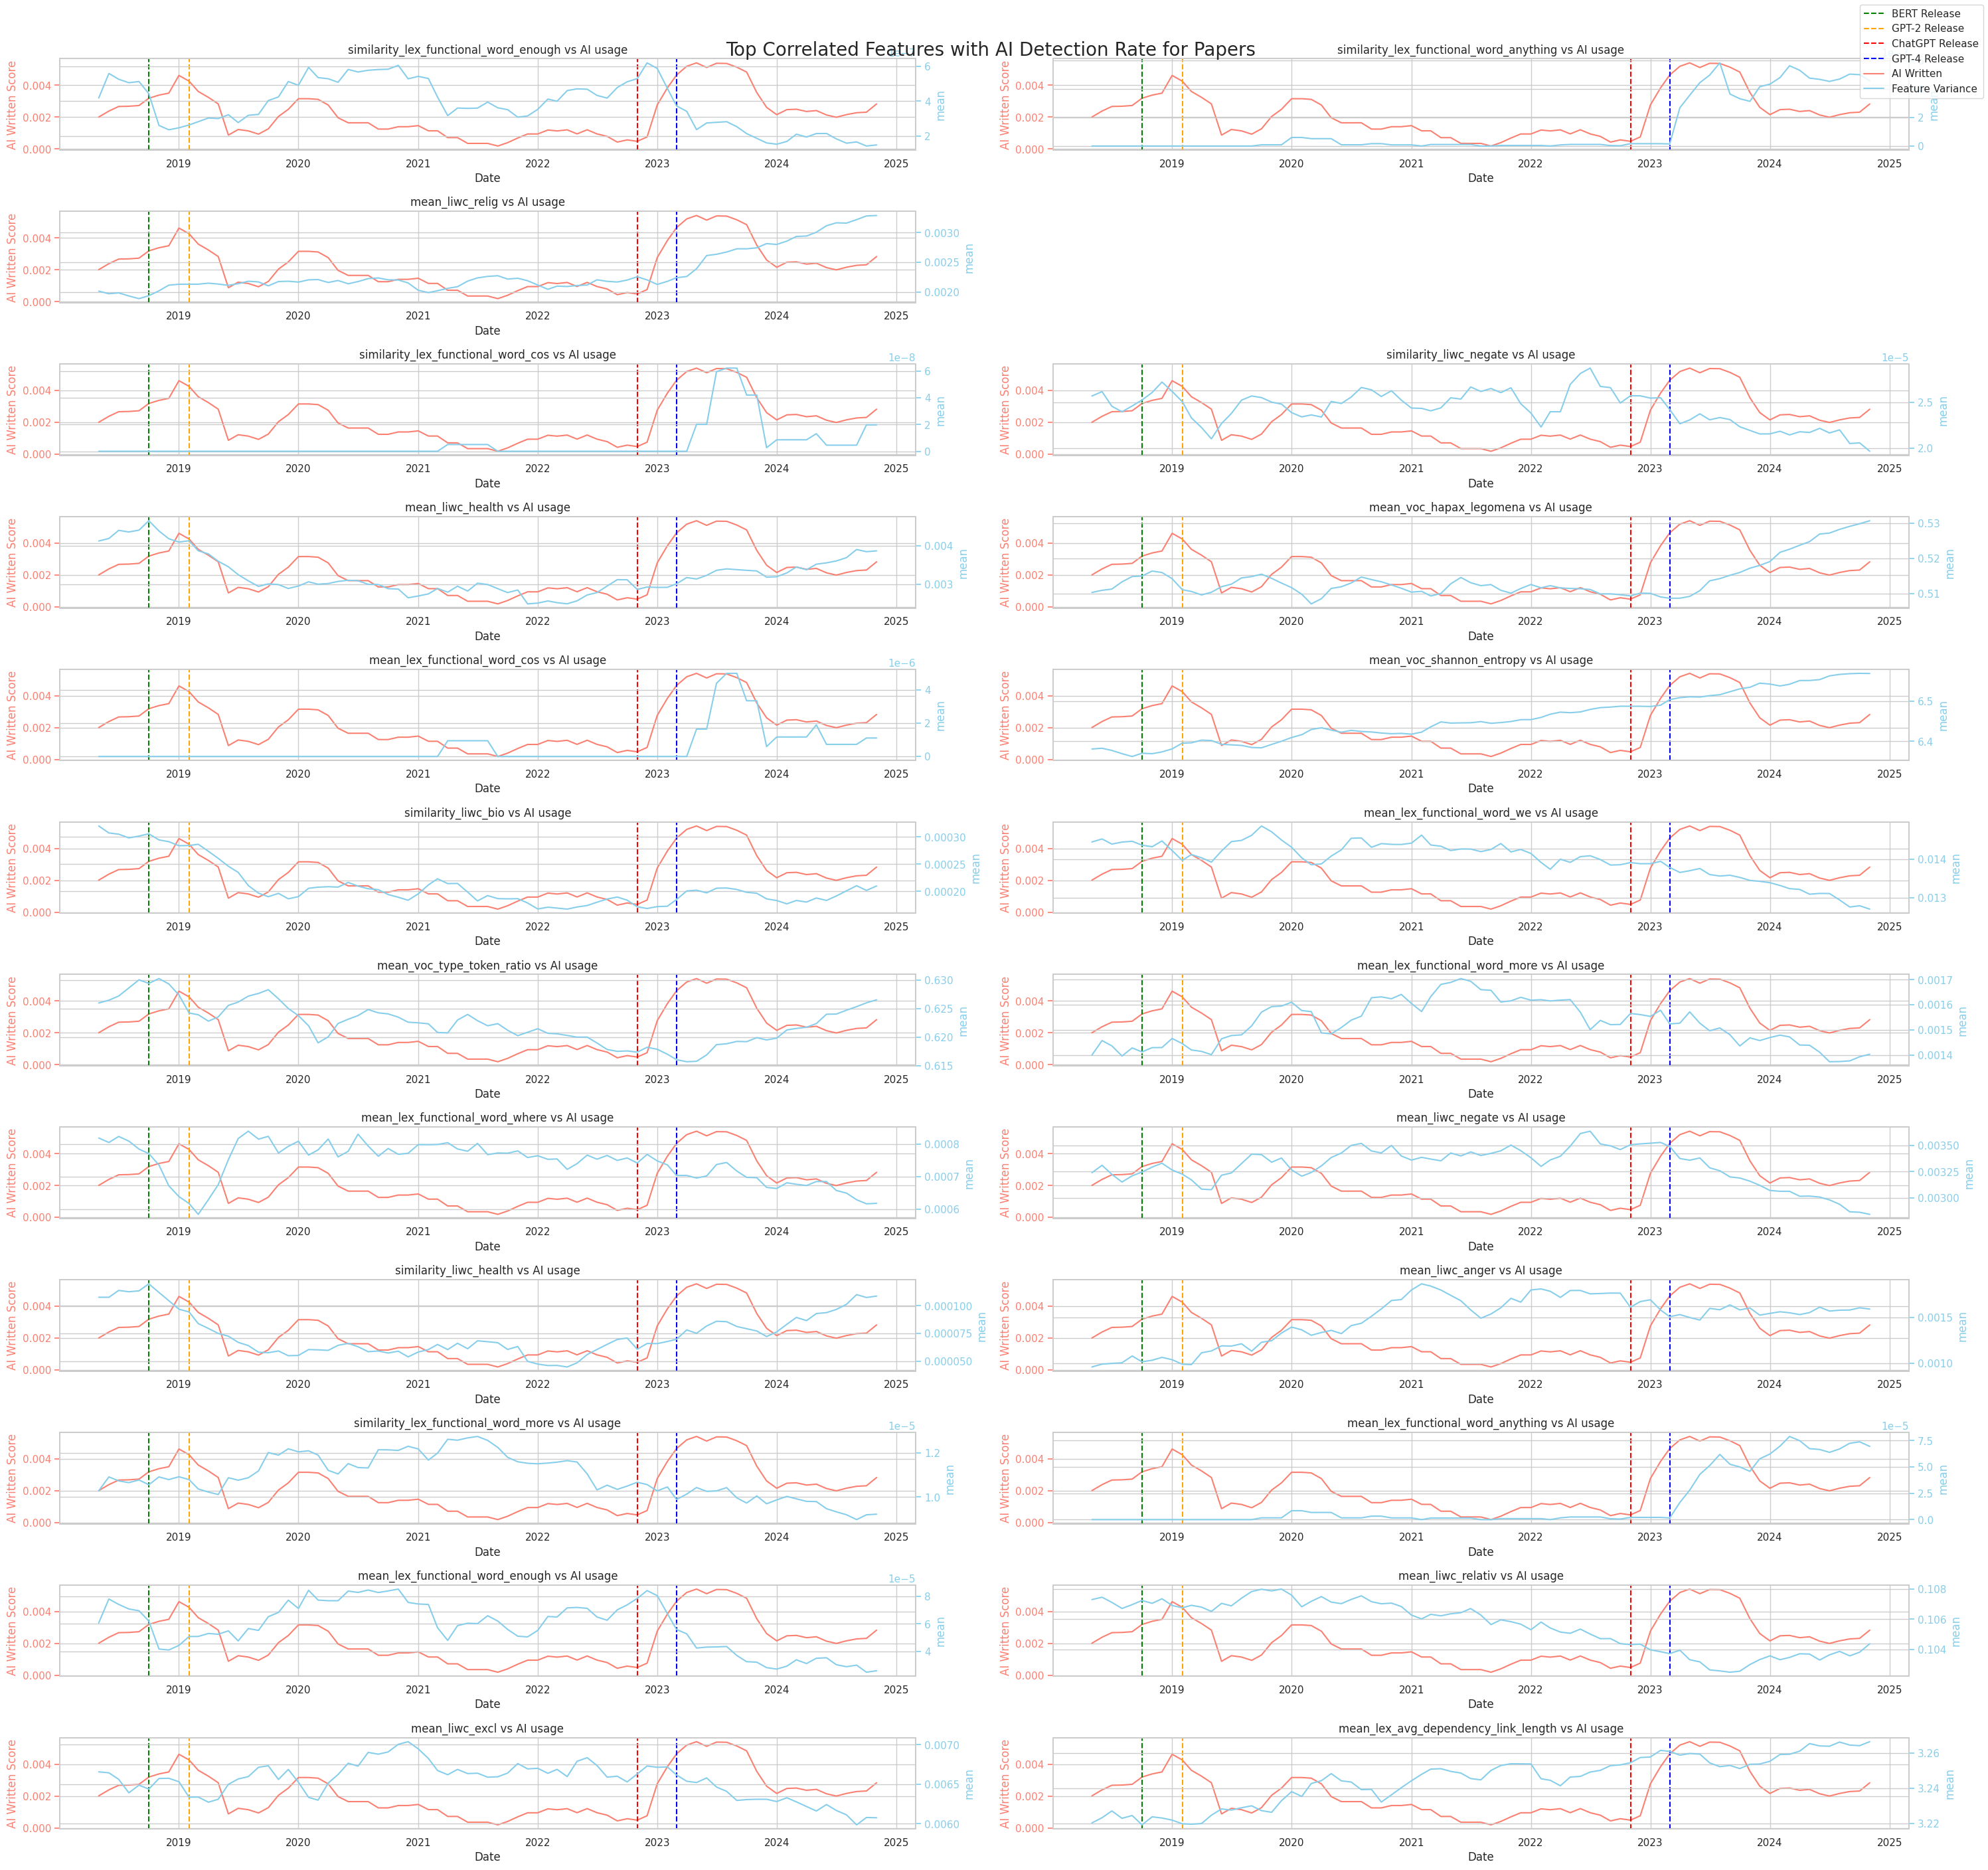

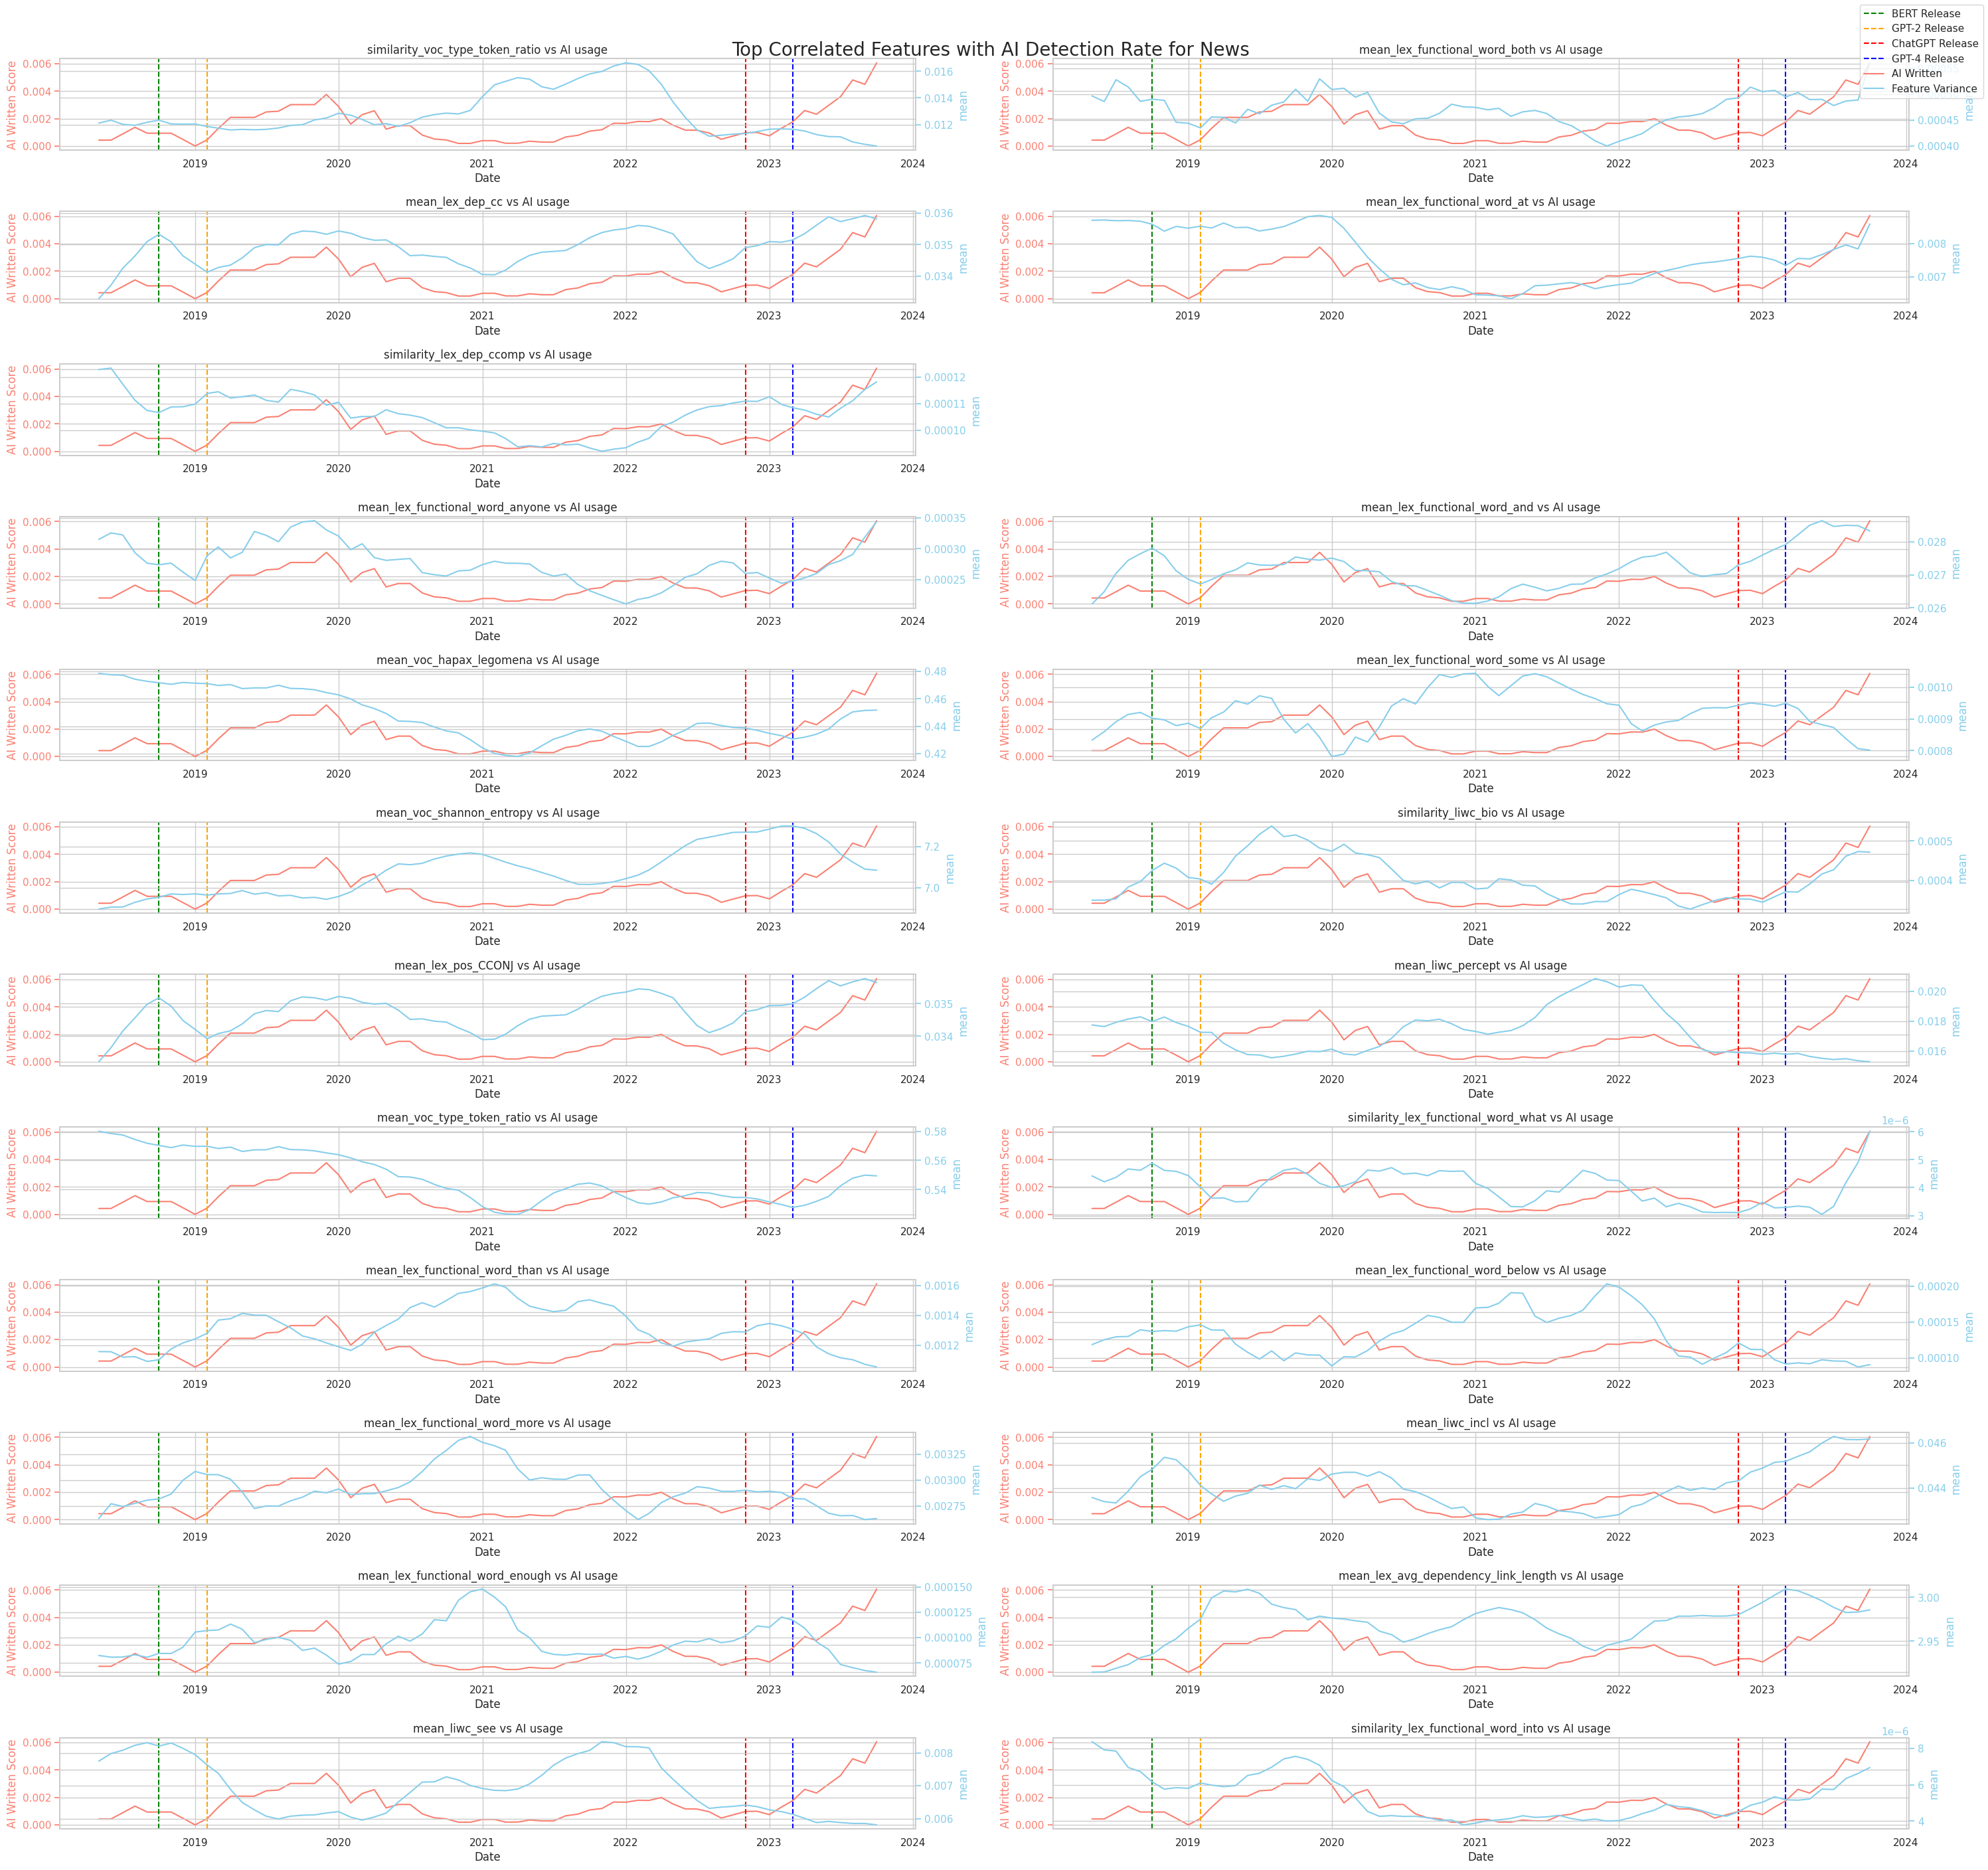

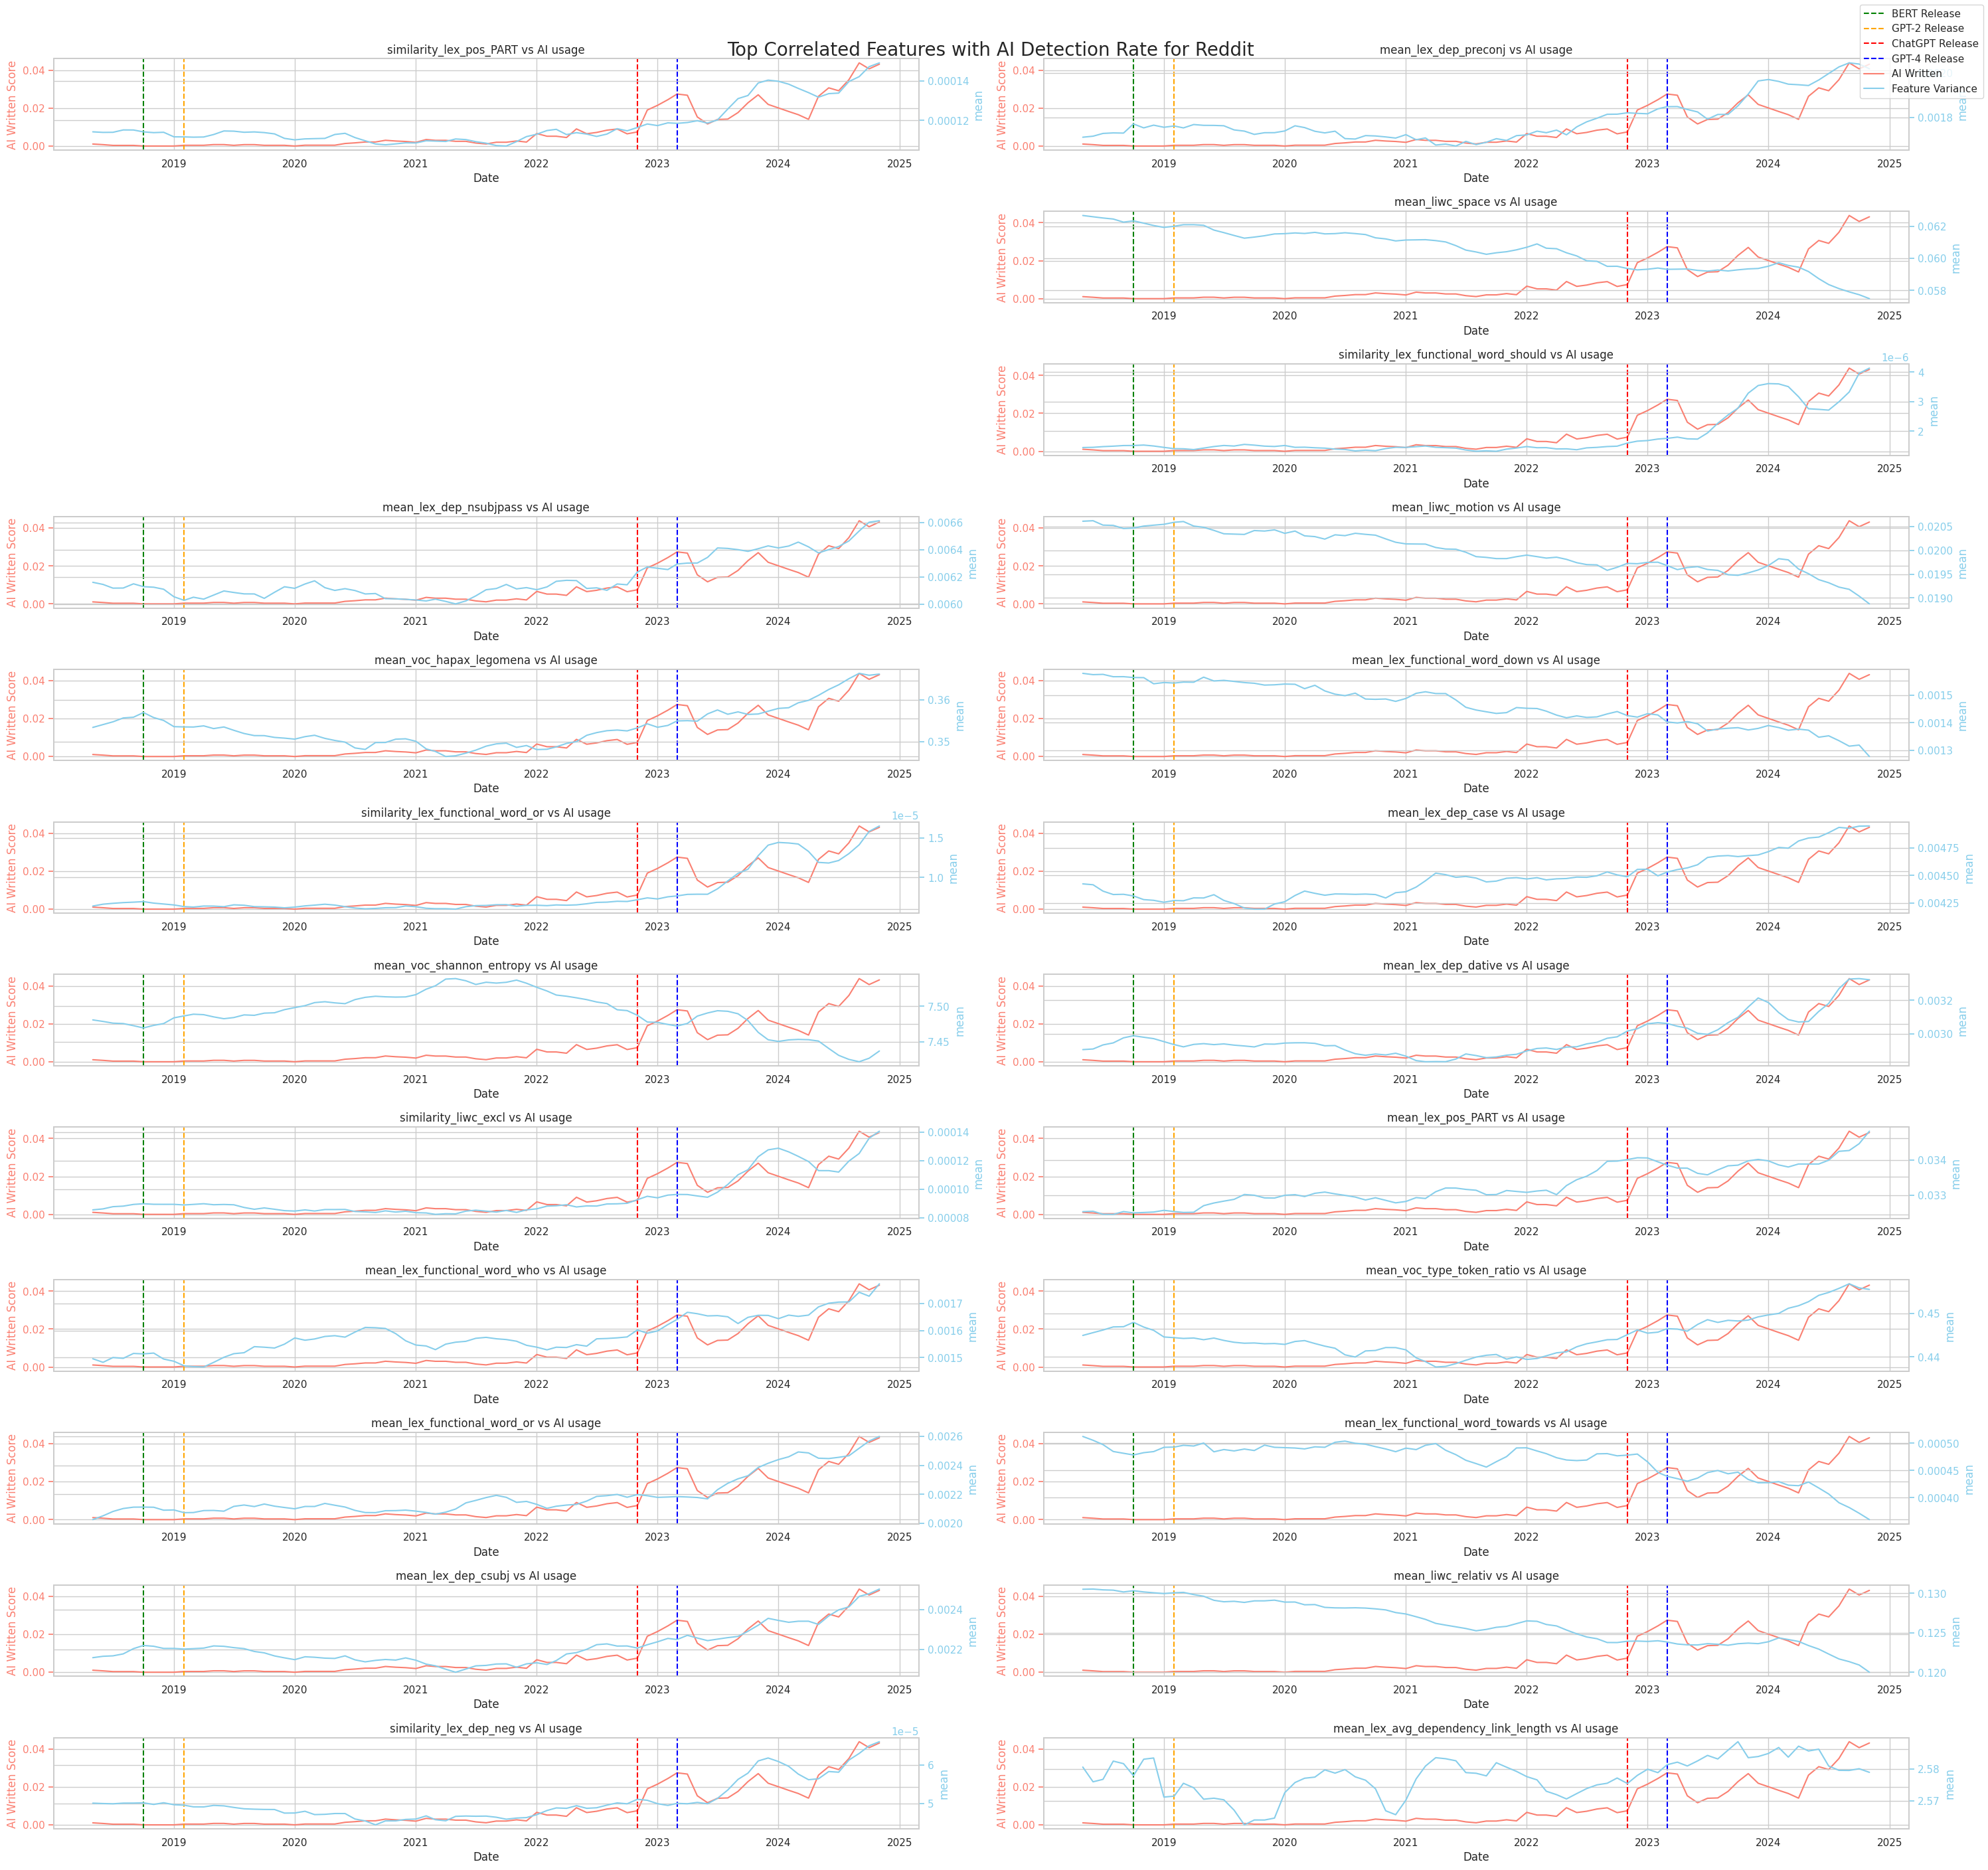

In [66]:
for cor_df, main_df, fig_title in zip(
    [
        papers_ai_top_correlated_df,
        news_ai_top_correlated_df,
        reddit_ai_top_correlated_df,
    ],
    [papers_merged_df, news_merged_df, reddit_merged_df],
    ["Papers", "News", "Reddit"],
):

    main_df = main_df.copy()

    fig = plt.figure(figsize=(30, 30))
    fig.suptitle(
        f"Top Correlated Features with AI Detection Rate for {fig_title}", fontsize=20
    )

    for i, feature in enumerate(cor_df.index):
        if feature == "ai_written" or feature == "date":
            continue
        ax = plt.subplot(13, 2, i + 1)
        ax2 = ax.twinx()  # Create a second y-axis sharing the same x-axis

        main_df[feature] = main_df[feature].rolling(window=5).mean()

        # Plot AI Written on left y-axis
        line1 = ax.plot(
            main_df["date"],
            main_df["ai_written"],
            label="AI Written",
            color="salmon",
        )

        # Plot feature on right y-axis
        line2 = ax2.plot(
            main_df["date"],
            main_df[feature],
            label="Feature Variance",
            color="skyblue",
        )

        ax.set_ylabel("AI Written Score", color="salmon")
        ax2.set_ylabel(feature_to_look_at, color="skyblue")
        ax.set_xlabel("Date")
        ax.set_title(f"{feature} vs AI usage")

        # Combine legends from both axes
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        # ax.legend(lines, labels)

        # Color the tick labels to match the lines
        ax.tick_params(axis="y", colors="salmon")
        ax2.tick_params(axis="y", colors="skyblue")

        # Use actual dates instead of indices for the vertical lines
        bert_date = pd.to_datetime("2018-10-01")
        gpt2_date = pd.to_datetime("2019-02-01")
        chatgpt_date = pd.to_datetime("2022-11-01")
        gpt4_date = pd.to_datetime("2023-03-01")

        # Plot vertical lines at actual dates
        ax.axvline(x=bert_date, color="green", linestyle="--")
        ax.axvline(x=gpt2_date, color="orange", linestyle="--")
        ax.axvline(x=chatgpt_date, color="red", linestyle="--")
        ax.axvline(x=gpt4_date, color="blue", linestyle="--")

        # Add text labels at dates
        # ax.text(
        #     bert_date,
        #     0.1,
        #     "BERT Release",
        #     rotation=90,
        #     verticalalignment="bottom",
        #     horizontalalignment="center",
        # )
        # ax.text(
        #     gpt2_date,
        #     0.1,
        #     "GPT-2 Release",
        #     rotation=90,
        #     verticalalignment="bottom",
        #     horizontalalignment="center",
        # )
        # ax.text(
        #     chatgpt_date,
        #     0.1,
        #     "ChatGPT Release",
        #     rotation=90,
        #     verticalalignment="bottom",
        #     horizontalalignment="center",
        # )
        # ax.text(
        #     gpt4_date,
        #     0.1,
        #     "GPT-4 Release",
        #     rotation=90,
        #     verticalalignment="bottom",
        #     horizontalalignment="center",
        # )

    # make a legend for the lines of the models with their colors and names
    models_legend = [
        plt.Line2D([0], [0], color="green", linestyle="--", label="BERT Release"),
        plt.Line2D([0], [0], color="orange", linestyle="--", label="GPT-2 Release"),
        plt.Line2D([0], [0], color="red", linestyle="--", label="ChatGPT Release"),
        plt.Line2D([0], [0], color="blue", linestyle="--", label="GPT-4 Release"),
        plt.Line2D([0], [0], color="salmon", label="AI Written"),
        plt.Line2D([0], [0], color="skyblue", label="Feature Variance"),
    ]
    # draw this for the figure
    fig.legend(handles=models_legend, loc="upper right")
    plt.tight_layout()
    plt.show()

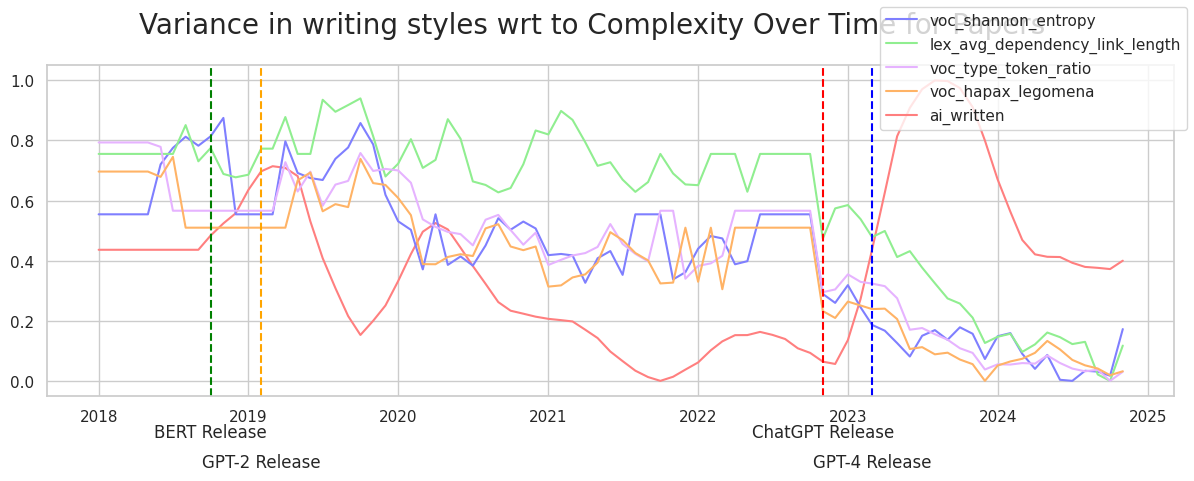

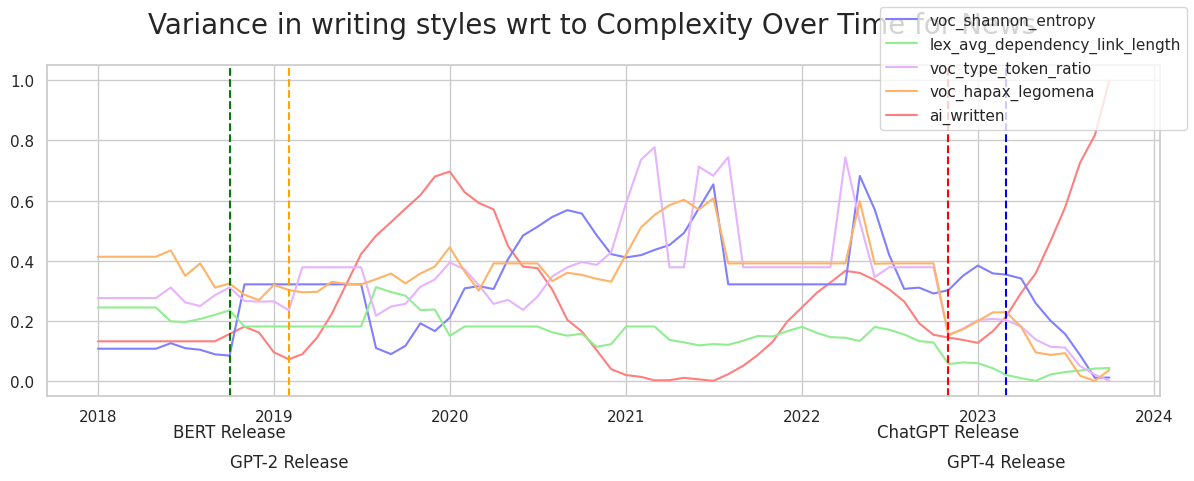

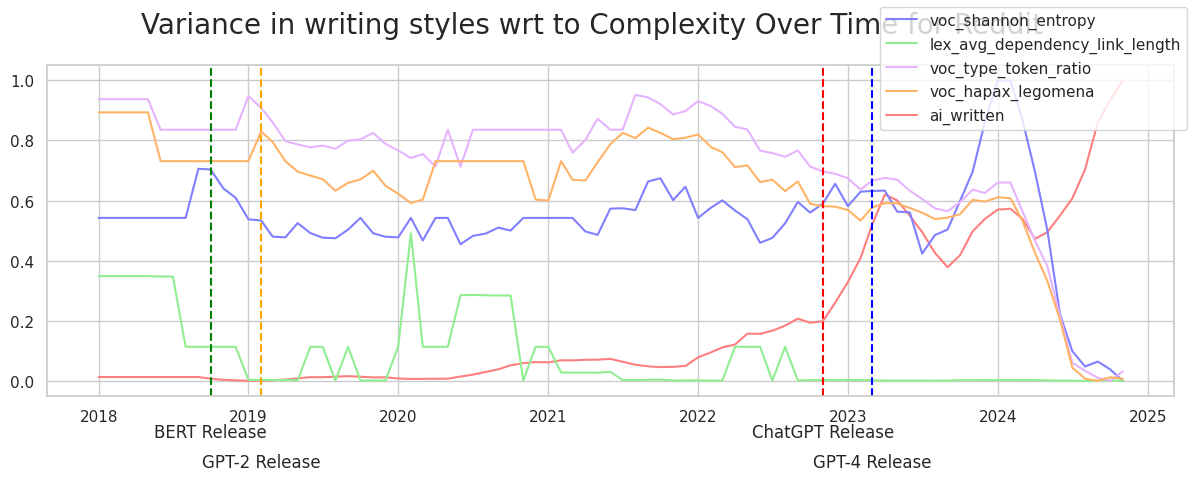

In [67]:
# just like the previous one, but this time, do one plot per source and show all the features plus the AI written thing in one plot. Do normalization to take into account the different scales for different features. Also, add vertical lines for the release dates of the models

complexity_features_to_colors = {
    # "voc_simpson_index": ,  # light red
    "voc_shannon_entropy": "#7f7fff",  # light blue
    "lex_avg_dependency_link_length": "#90EE90",  # light green
    "voc_type_token_ratio": "#E6B3FF",  # light purple
    "voc_hapax_legomena": "#FFB366",  # light orange
    "ai_written": "#ff7f7f",  # light salmon
}

for main_df, fig_title in zip(
    [papers_merged_df, news_merged_df, reddit_merged_df],
    ["Papers", "News", "Reddit"],
):

    main_df = main_df.copy()

    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(
        f"Variance in writing styles wrt to Complexity Over Time for {fig_title}",
        fontsize=20,
    )
    normalized_values_dict = {}
    for feature in ["ai_written", *columns_about_complexity]:
        feature = f"similarity_{feature}" if feature != "ai_written" else feature
        feature_values = main_df[feature].rolling(window=5).mean().values
        feature_value_for_nans_to_be_replaced = feature_values[
            ~np.isnan(feature_values)
        ][0]
        feature_values = np.where(
            np.isnan(feature_values),
            feature_value_for_nans_to_be_replaced,
            feature_values,
        )
        normalized_values = (feature_values - np.min(feature_values)) / (
            np.max(feature_values) - np.min(feature_values)
        )
        if feature != "ai_written":
            indices_before_2022_nov = main_df[main_df["date"] < "2022-11-01"].index
            indices_after_2022_nov = main_df[main_df["date"] >= "2022-11-01"].index

            # for the values that fall before that date, replace the extreme values with their mean
            values_after = normalized_values[indices_after_2022_nov]
            values_before = normalized_values[indices_before_2022_nov]

            mean_value_for_replacement = np.mean(values_before)
            extreme_values_indices = np.where(
                (
                    np.bitwise_or(
                        values_before > np.percentile(values_before, 85),
                        values_before < np.percentile(values_before, 15),
                    )
                )
            )
            other_indices = np.where(
                (
                    np.bitwise_and(
                        values_before <= np.percentile(values_before, 85),
                        values_before >= np.percentile(values_before, 15),
                    )
                )
            )
            mean_value_for_replacement = np.mean(values_before[other_indices])
            values_before[extreme_values_indices] = mean_value_for_replacement
            normalized_values_reassambled = np.concatenate(
                (values_before, values_after)
            )
            normalized_values_dict[feature] = normalized_values_reassambled
        else:
            normalized_values_dict[feature] = normalized_values

    for feature_name, feature_values in normalized_values_dict.items():
        plt.plot(
            main_df["date"],
            feature_values,
            label=feature_name,
            color=complexity_features_to_colors[
                (
                    feature_name[feature_name.find("_") + 1 :]
                    if "similarity_" in feature_name
                    else feature_name
                )
            ],
        )

    # Use actual dates instead of indices for the vertical lines
    bert_date = pd.to_datetime("2018-10-01")
    gpt2_date = pd.to_datetime("2019-02-01")
    chatgpt_date = pd.to_datetime("2022-11-01")
    gpt4_date = pd.to_datetime("2023-03-01")

    # Plot vertical lines at actual dates
    plt.axvline(x=bert_date, color="green", linestyle="--")
    plt.axvline(x=gpt2_date, color="orange", linestyle="--")
    plt.axvline(x=chatgpt_date, color="red", linestyle="--")
    plt.axvline(x=gpt4_date, color="blue", linestyle="--")

    plt.text(
        bert_date,
        -0.2,
        "BERT Release",
        verticalalignment="bottom",
        horizontalalignment="center",
    )
    plt.text(
        gpt2_date,
        -0.3,
        "GPT-2 Release",
        verticalalignment="bottom",
        horizontalalignment="center",
    )
    plt.text(
        chatgpt_date,
        -0.2,
        "ChatGPT Release",
        verticalalignment="bottom",
        horizontalalignment="center",
    )
    plt.text(
        gpt4_date,
        -0.3,
        "GPT-4 Release",
        verticalalignment="bottom",
        horizontalalignment="center",
    )

    # make a legend for the lines of the models with their colors and names
    models_legend = []
    for feature_name, color in complexity_features_to_colors.items():
        models_legend.append(plt.Line2D([0], [0], color=color, label=feature_name))
    # draw this for the figure
    fig.legend(handles=models_legend, loc="upper right")
    plt.tight_layout()
    plt.show()

In [68]:
# write the merged dataframes to csv
papers_merged_df.to_csv("papers/papers_merged.csv", index=False)
news_merged_df.to_csv("news/news_merged.csv", index=False)
reddit_merged_df.to_csv("reddit/reddit_merged.csv", index=False)